**Overview of the Dataset**

This dataset provides a comprehensive analysis of road traffic crashes in Nigeria from Q4 2020 to Q1 2024. It contains quarterly data on the total number of crashes, injuries, fatalities, and vehicles involved, as well as key contributing factors. The dataset allows us to explore various elements that impact road safety, such as speed violations, driving under the influence of alcohol or drugs, and poor weather conditions. These factors are critical in understanding the causes of accidents and can guide policy decisions to improve road safety. <br>

**Features:**
* *Quarter:* The quarter in which the data is recorded (e.g., Q4 2020, Q1 2024). This serves as the temporal reference for the dataset.

* *State:* The Nigerian state where the traffic crashes occurred. This enables regional analysis of the crash data.

* *Total Crashes:* The total number of road traffic crashes reported per quarter for each state.

* *Number Injured:* The total number of individuals injured in road traffic crashes per quarter, reflecting the severity of the crashes.

* *Number Killed:* The total number of fatalities resulting from road traffic crashes per quarter.
* *Total Vehicles Involved:* The total number of vehicles involved in the crashes per quarter, which can be used to assess traffic volume and crash rates.
* *Speed Violation (SPV):* The number of crashes attributed to speed violations, which is a significant factor in many accidents.
* *Driving Under Alcohol/Drug Influence (DAD):* The number of crashes where driving under the influence of alcohol or drugs was a contributing factor.
* *Poor Weather (PWR):* The number of crashes that occurred due to poor weather conditions, which increase the risks of accidents.
* *Fatigue (FTQ):* The number of crashes attributed to driver fatigue, emphasizing the impact of driver alertness on road safety.
* *Bad Roads (BRD):* The number of crashes linked to poor road conditions, including potholes, lack of proper signage, or inadequate infrastructure, which can significantly contribute to accidents.
* *Other Factors (OTH):* This includes various other conditions that may contribute to accidents, such as distracted driving, reckless driving, or poor vehicle maintenance.

**Data Wrangling**

In [1]:
# Import the needed libraries
import numpy as np
import pandas as pd
# Data vizualization
import seaborn as sns
import matplotlib.pyplot as plt
# Statistical tests
from scipy.stats import pearsonr, f_oneway, chi2_contingency


In [2]:
# Load the dataset
road_df = pd.read_csv('C:/Users/acer/Desktop/Data_science_projects/Nigerian_Traffic_Crash.csv')

In [4]:
road_df.head(20)

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66
5,Q4 2020,Bayelsa,1,3,0,1,1,0,0,0,0
6,Q4 2020,Benue,77,177,25,81,81,0,0,0,0
7,Q4 2020,Borno,25,67,16,18,11,0,0,0,7
8,Q4 2020,Cross River,33,65,11,39,23,0,0,0,16
9,Q4 2020,Delta,67,182,36,111,70,0,0,0,41


In [42]:
road_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.6+ KB


In [43]:
road_df.shape

(518, 11)

The dataset has 518 rows and 11 columns, with 518 observations and 11 features.

In [44]:
# Check for missing values
road_df.isnull().sum()

Quarter                    0
State                      0
Total_Crashes              0
Num_Injured                0
Num_Killed                 0
Total_Vehicles_Involved    0
SPV                        0
DAD                        0
PWR                        0
FTQ                        0
Other_Factors              0
dtype: int64

The dataset contains no missing or empty values, all rows are complete and ready for analysis.

In [47]:
road_df.head(5)

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66


In [48]:
# Stripping any leading or trailing spaces and then capitalizing each word in the 'State' column
road_df['State'] = road_df['State'].str.strip().str.title()

In [ ]:
road_df

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...
513,Q1 2024,Rivers,15,32,4,21,17,0,0,0,4
514,Q1 2024,Sokoto,24,122,41,52,41,0,0,0,11
515,Q1 2024,Taraba,38,98,17,38,17,0,0,0,21
516,Q1 2024,Yobe,39,234,13,55,38,0,0,0,17


In [50]:
# Remove duplicates rows from the dataset to avoid redundant information
road_df.drop_duplicates(inplace = True)

In [51]:
# Aggregate data by year from the 'Quarter' columns to observe patterns over time.
road_df['Year'] = road_df['Quarter'].str[-4:].astype(int)
yearly_data = road_df.groupby('Year').sum()

In [53]:
# Create a new column to extract meaningful insights from the data\
# Create a new column 'Casualty count'  by summing up the number of injuries and deaths
road_df['Casualty_count'] = road_df['Num_Killed'] + road_df['Num_Injured']

road_df

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Year,Casualty_count
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18,2020,177
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37,2020,270
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8,2020,35
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39,2020,172
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66,2020,775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Q1 2024,Rivers,15,32,4,21,17,0,0,0,4,2024,36
514,Q1 2024,Sokoto,24,122,41,52,41,0,0,0,11,2024,163
515,Q1 2024,Taraba,38,98,17,38,17,0,0,0,21,2024,115
516,Q1 2024,Yobe,39,234,13,55,38,0,0,0,17,2024,247


In [54]:
# Create a new column 'Fatality rate' that measures how deadly the crashes are
road_df['Fatality_rate'] = road_df['Num_Killed'] / road_df['Total_Crashes']

road_df

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Year,Casualty_count,Fatality_rate
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18,2020,177,1.033333
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37,2020,270,0.467532
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8,2020,35,0.318182
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39,2020,172,0.277778
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66,2020,775,0.584416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Q1 2024,Rivers,15,32,4,21,17,0,0,0,4,2024,36,0.266667
514,Q1 2024,Sokoto,24,122,41,52,41,0,0,0,11,2024,163,1.708333
515,Q1 2024,Taraba,38,98,17,38,17,0,0,0,21,2024,115,0.447368
516,Q1 2024,Yobe,39,234,13,55,38,0,0,0,17,2024,247,0.333333


In [55]:
# Calculate the ration of vehicles involved per crash
road_df['Vehicle_crash_ratio'] = road_df['Total_Vehicles_Involved'] / road_df['Total_Crashes']

road_df

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Year,Casualty_count,Fatality_rate,Vehicle_crash_ratio
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18,2020,177,1.033333,1.233333
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37,2020,270,0.467532,1.220779
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8,2020,35,0.318182,1.090909
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39,2020,172,0.277778,1.152778
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66,2020,775,0.584416,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Q1 2024,Rivers,15,32,4,21,17,0,0,0,4,2024,36,0.266667,1.400000
514,Q1 2024,Sokoto,24,122,41,52,41,0,0,0,11,2024,163,1.708333,2.166667
515,Q1 2024,Taraba,38,98,17,38,17,0,0,0,21,2024,115,0.447368,1.000000
516,Q1 2024,Yobe,39,234,13,55,38,0,0,0,17,2024,247,0.333333,1.410256


**Descriptive Analysis**

In [57]:
road_df.describe()

,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Year,Casualty_count,Fatality_rate,Vehicle_crash_ratio
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,83.517375,245.631274,40.600386,100.667954,37.903475,0.140927,0.355212,23.824324,38.444015,2022.000000,286.231660,0.548244,1.188782
std,77.023061,201.131483,36.858302,108.567113,57.093042,0.454320,1.677385,51.024267,61.983992,1.070078,233.890757,0.366000,0.393536
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-348.000000,2020.000000,2.000000,0.000000,0.000000
25%,30.000000,96.250000,15.000000,32.000000,0.000000,0.000000,0.000000,0.000000,12.000000,2021.000000,113.250000,0.315058,1.045455
50%,58.000000,185.500000,30.000000,64.000000,15.000000,0.000000,0.000000,0.000000,27.000000,2022.000000,217.000000,0.482676,1.211324
75%,107.750000,331.500000,55.750000,134.750000,55.000000,0.000000,0.000000,21.000000,57.000000,2023.000000,389.250000,0.691117,1.394816
max,538.000000,1149.000000,224.000000,864.000000,340.000000,4.000000,25.000000,425.000000,586.000000,2024.000000,1345.000000,2.846154,2.354839


**Descriptive Analysis Observation:**

The dataset provides a comprehensive overview of road traffic crashes in Nigeria between Q4 2020 and Q1 2024, containing a total of 518 entries. The data spans several key features, including the number of crashes, injuries, fatalities, vehicles involved, and contributing factors like speed violations, driving under the influence, poor weather conditions, and driver fatigue. <br>

* *Total Crashes:* The dataset shows a wide range in the total number of crashes reported, with the mean value at 83.5 crashes per quarter, but the maximum value reaching as high as 538. This variance suggests that while some quarters have a relatively lower number of crashes, there are instances of very high crash occurrences in certain periods. The standard deviation of 77.02 further reinforces this fluctuation.

* *Injuries and Fatalities:* The average number of injuries per quarter is 245.6, with the number of fatalities averaging 40.6. These figures highlight the severity of crashes, though the spread, as shown by the standard deviations (201.13 for injuries and 36.86 for fatalities), indicates significant variability from quarter to quarter. The maximum fatalities recorded in a quarter were 224, while the highest injury count was 1,149.
* *Vehicles Involved:* An average of 100.7 vehicles were involved in crashes each quarter, with a maximum of 864 vehicles. This suggests that crashes often involve multiple vehicles, though there are cases with far fewer vehicles involved.
* *Contributing Factors:* The data includes factors such as Speed Violations (SPV), Drunk Driving (DAD), Poor Weather (PWR), and Fatigue (FTQ). Speed violations are notably high, with an average of 37.9 incidents per quarter, peaking at 340 in some instances. Drunk driving (DAD) and poor weather conditions (PWR) are also significant contributors, though their numbers vary considerably across quarters, indicating that these factors may fluctuate depending on external circumstances, such as weather conditions or enforcement of traffic laws.
* *Yearly Trends:* The dataset spans across four years, from 2020 to 2024. There is a noticeable increase in the number of total crashes, fatalities, and injuries between 2020 and 2024, with the figures generally trending upward. For example, in 2020, the total crashes were relatively low compared to later years, indicating that traffic-related incidents increased as the years progressed. This could be indicative of rising traffic volumes, changes in road conditions, or other unaccounted factors.
* *Other Factors:* The “Other_Factors” column, which likely includes additional causes such as poor road conditions or infrastructural challenges, has a mean value of 38.4 and ranges from -348 to 586. This broad range suggests that while the “Other_Factors” category may be underreported or inconsistently recorded, it still represents a significant variable worth investigating further.
* *Correlation Insights:* There appears to be a correlation between the total number of crashes and fatalities, with a significant increase in fatalities observed as the number of crashes rises. The Vehicle Crash Ratio (1.18) and Fatality Rate (0.55) further support this observation, highlighting that more severe accidents lead to a higher proportion of fatalities. Additionally, the high standard deviations across several columns, especially in contributing factors like Speed Violations and Poor Weather, suggest that certain external variables could play a more prominent role in some quarters than in others.

**Data Vizualization**

<Axes: xlabel='Casualty_count', ylabel='Count'>

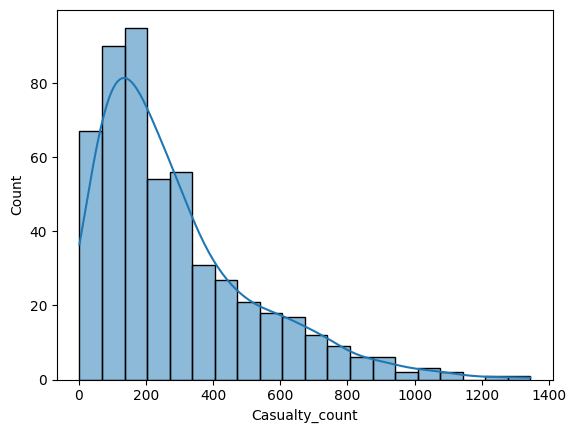

In [58]:
# Distribution of casualty count
sns.histplot(road_df['Casualty_count'], kde = True)

**Observation on Casualty Count Distribution:**

The graph reveals a right skew (positive skew). The distribution indicates that most traffic crashes result in relatively fewer casualties. 
However, the tail extends towards the higher values, showing that there are a few instances with significantly higher casualty counts. 
This right skewness suggests that while the majority of crashes involve fewer injuries, some crashes result in much higher casualties, influencing the overall distribution.

<Axes: xlabel='State'>

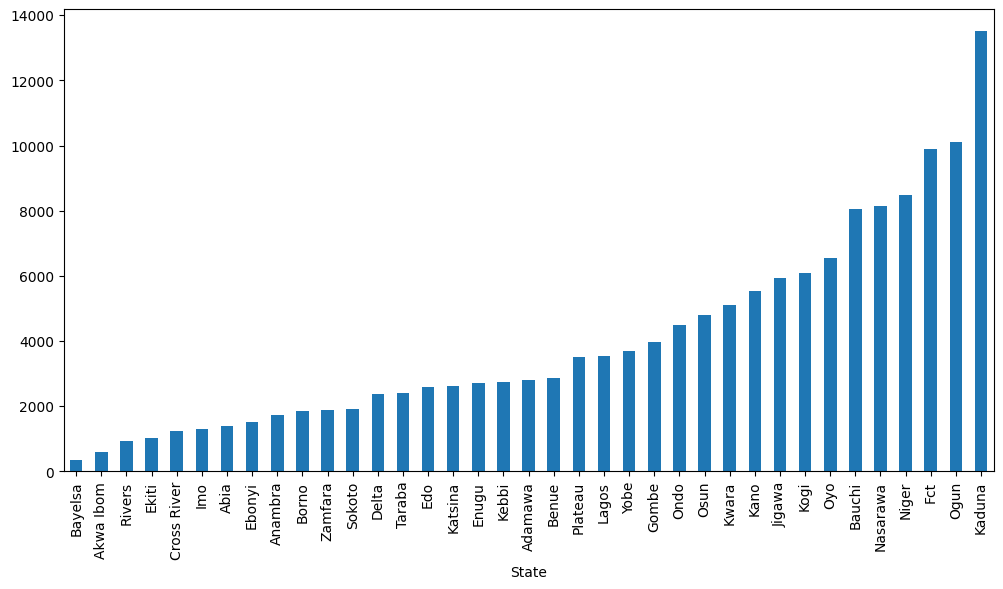

In [59]:
# Casualty count by state
state_casualty = road_df.groupby('State')['Casualty_count'].sum().sort_values()
state_casualty.plot(kind = 'bar', figsize=(12, 6))

**Observation on Casualty Count by State:**

After analyzing the casualty count by state, the results indicate that Kaduna has the highest casualty count, followed by Ogun, FCT (Federal Capital Territory), Niger, Nasarawa, and Bauchi. The pattern continues with Oyo, Kogi, Jigawa, Kano, Kwara, and Osun ranking next in terms of the total casualty count. States like Lagos, Plateau, Benue, Adamawa, and Kebbi also report notable figures. On the other hand, states like Enugu, Katsina, Edo, Taraba, Delta, and Sokoto show relatively lower casualty counts compared to the top-ranking states. The states with the least casualties include Zamfara, Borno, Anambra, Ebonyi, Abia, Imo, Cross River, Ekiti, Rivers, Akwa Ibom, and Bayelsa.

This variation in casualty counts across states could reflect regional differences in road infrastructure, traffic volume, enforcement of road safety laws, and other socio-economic factors influencing road safety.

<Axes: >

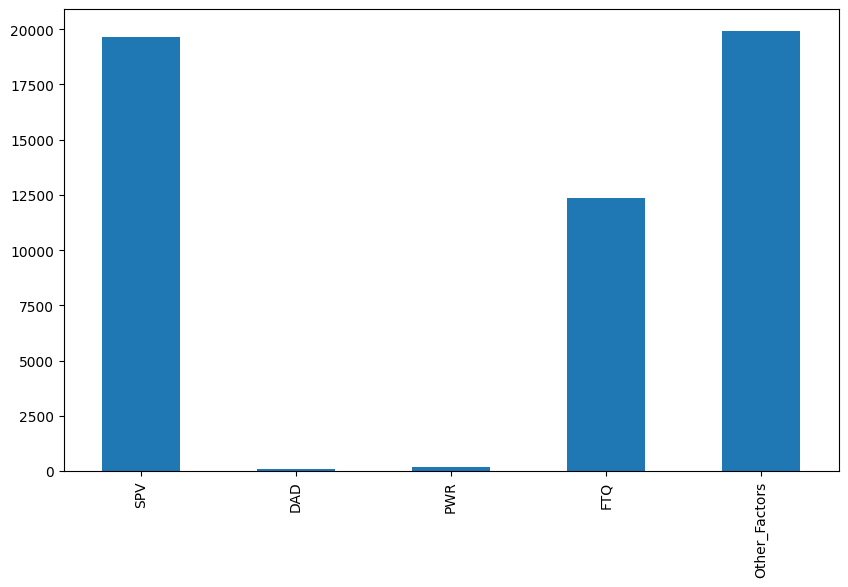

In [60]:
# Comparing crash factors(SPV, DAD, PWD, FTQ, Other_factors)
crash_factors = road_df[['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']].sum()
crash_factors.plot(kind = 'bar', stacked = True, figsize=(10, 6))

**Observation on Comparison of Crash Factors:**

From the visualization comparing crash factors, Other Factors emerge as the highest contributors to road traffic crashes, closely followed by Speed Violations (SPV), both nearing 20,000 incidents. This highlights their significant influence on traffic crash occurrences. Driver Fatigue (FTQ) follows as the next major contributor, though its impact is comparatively smaller.

On the lower end of the spectrum, Driving Under Alcohol/Drug Influence (DAD) is almost non-existent, contributing a negligible amount. Similarly, Poor Weather (PWR) also has a minimal contribution, slightly higher than DAD.

This analysis underscores the need for focused measures to address high-impact factors like Other Factors and SPV while considering the potential cumulative effects of lower-impact factors such as DAD and PWR.

<Axes: title={'center': 'Total Fatalities by State'}, xlabel='State'>

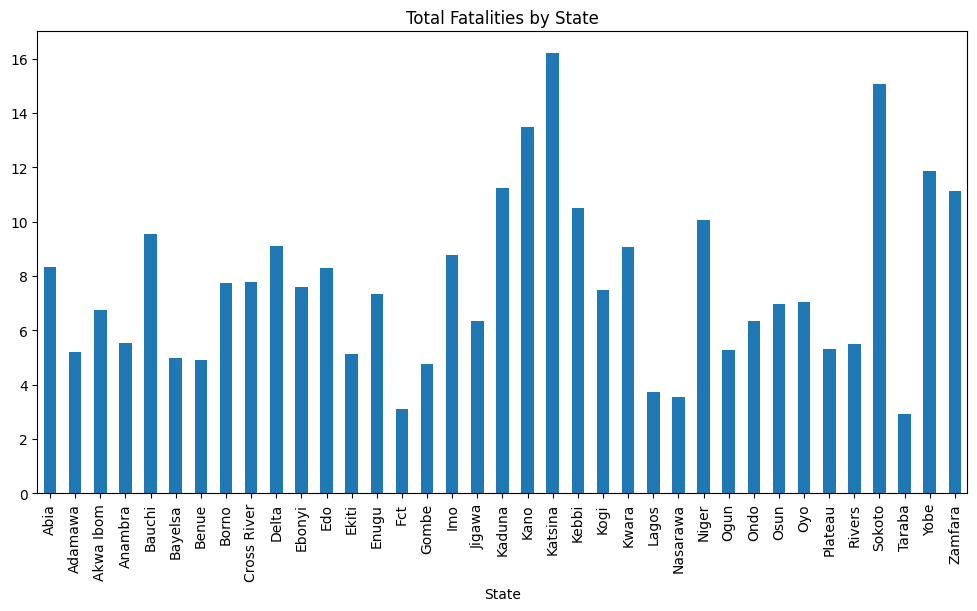

In [ ]:
# Plotting total fatalities by state to identify high-risk areas
fatality_by_state = road_df.groupby('State')['Fatality_rate'].sum()
fatality_by_state.plot(kind='bar', figsize=(12, 6), title='Total Fatalities by State')

**Observation on Total Fatality by State:**

From the analysis of the total fatalities across Nigerian states, Katsina emerges as the state with the highest fatality count, closely followed by Sokoto. These two states display noticeably elevated fatality rates compared to others. Kano, Yobe, and Kaduna also exhibit significant fatality rates, forming the next tier of high-risk states.

Further analysis shows states like Zamfara, Imo, Delta, Bauchi, and Abia registering relatively high fatality counts, though not as pronounced as the top-ranking states. Beyond these, other states exhibit moderate to lower fatality rates, collectively contributing to the overall trend.

This distribution suggests a need for targeted interventions in the high-risk states, especially Katsina and Sokoto, to mitigate traffic fatalities and improve road safety.

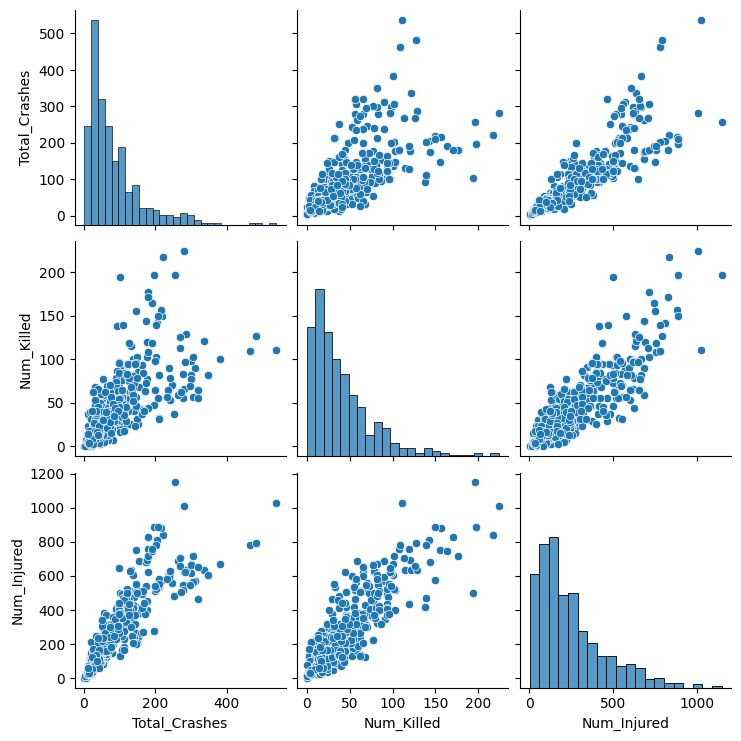

In [ ]:
# Plotting total fatalities by state to identify high-risk areas
sns.pairplot(road_df[['Total_Crashes', 'Num_Killed', 'Num_Injured']])

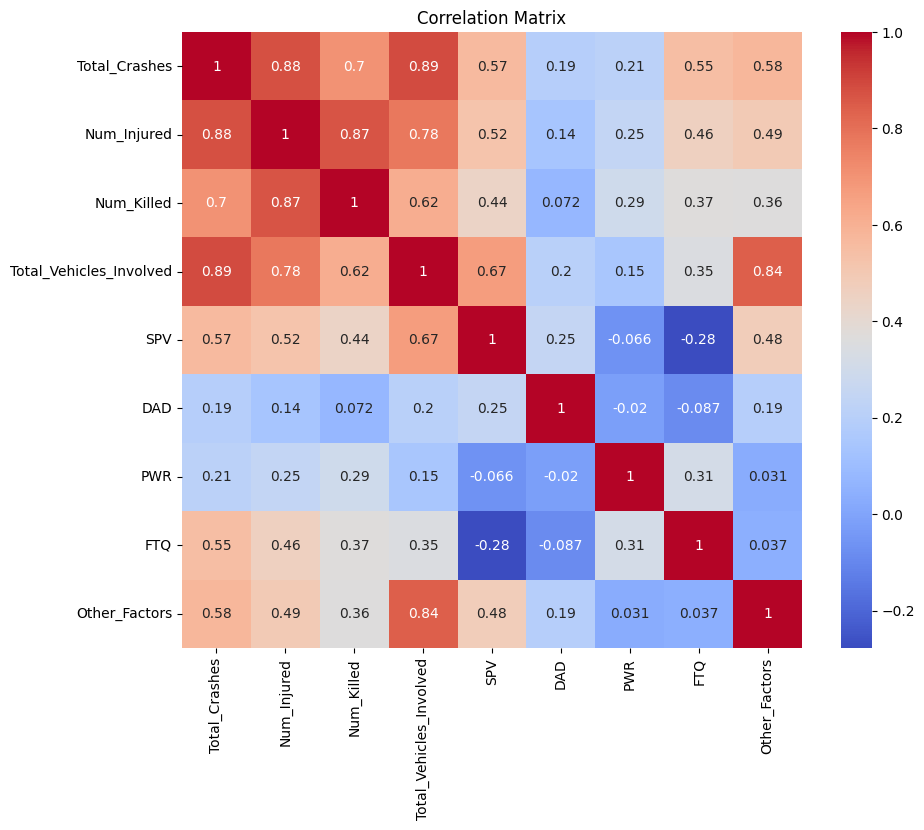

In [63]:
# Select numerical columns for correlation analysis
numerical_columns = ['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']

# Compute the correlation matrix
correlation_matrix = road_df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Observations for the Correlation Matrix**

**1. High Correlation:**
   
* There is a perfect correlation (1.0) along the diagonal of the matrix, as expected, since each variable is perfectly correlated with itself.

 * A strong correlation is observed between Total Crashes and Other Factors, indicating that changes in Other Factors are strongly linked to the number of crashes. <br>

**2. Moderate Correlations:**
* Correlations around 0.6–0.8 are observed for variables like Number Injured and Number Killed, as these naturally tend to increase together in crash scenarios.
* There are other moderately positive correlations with variables like Total Vehicles Involved and SPV, suggesting these factors contribute meaningfully to crash outcomes. <br>

**3. Low or Negative Correlations:**
* Variables like PWR and DAD show minimal or slightly negative correlations (close to 0 or -0.2) with most other factors, indicating limited impact.
* The shift from light blue to deep blue in these areas confirms the weak or inverse relationships.

## **Inferential Analysis**

###### **HYPOTHESIS TESTING**
* Does SPV(speed violation) significantly contribute to casualty count?

    * This analysis aims to examine whether there is a significant relationship between speed violations (SPV) and casualty count in road traffic crashes. By testing this hypothesis, the study seeks to understand the potential impact of speed violations on the severity of accidents, contributing valuable insights for road safety measures and policies.


In [64]:
# Define variables
x = road_df['SPV']
y = road_df['Casualty_count']



In [65]:
# Define null hypotheses
H0 = 'Speed violation(SPV) does not significantly affect casualty count'
# Define the alternative hypotheses
H1 = 'Speed violation(SPV) significantly affect casualty count'

corr_value, p_value = pearsonr(x, y)

# Print results
print(f"Correlation coefficient: {corr_value}")
print(f"P_value: {p_value}")

# Evaluate hypothesis based on p_value
alpha = 0.05 # Level of significance
if p_value < alpha:
    print(f"Reject H0: {H1}")
else:
    print(f"Fail to reject H0: {H0}")




Correlation coefficient: 0.5170982978394981
P_value: 9.261003548884622e-37
Reject H0: Speed violation(SPV) significantly affect casualty count


**CONCLUSION**

- The results show a correlation coefficient of 0.517, which means there’s a moderate positive relationship between speed violations (SPV) and casualty count. The p_value is extremely low, leading us to reject the null hypothesis (H₀). This confirms that speed violations significantly affect casualty count.

- This tells us how important it is to control speed on the roads. Enforcing speed limits and spreading awareness can go a long way in reducing casualties.

#### **Testing if the mean number of crashes(Total_Crashes) differs across state using ANOVA**

* This analysis aims to test whether the mean number of total crashes differs significantly across various states. Using ANOVA, the study seeks to determine if there are state-specific variations in the frequency of crashes, which could inform targeted interventions and policies for improving road safety in different regions.

In [66]:
# Group by 'State' and extract crash counts
grouped_data = [group['Total_Crashes'].values for _, group in road_df.groupby('State')]

# Perform ANOVA
f_stat, p_value = f_oneway(*grouped_data)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("Reject H₀: The mean number of crashes differs across states.")
else:
    print("Fail to reject H₀: No significant difference in mean crashes across states.")



F-Statistic: 120.09780150128029
P-Value: 1.099899445757094e-215
Reject H₀: The mean number of crashes differs across states.


**CONCLUSION**
- The ANOVA results show an F-Statistic of 120.10 and an exceptionally small p_value(very close to zero). Since the p-value is way below 0.05, we reject the null hypothesis. This means the average number of crashes is not the same across the states.

- This shows that crashes vary significantly depending on the state, which suggests the need for customized safety measures in different regions.

#### **Testing if Quarter impacts or affects the frequency of crashes using CHI-Square**

* This analysis examines whether the quarter of the year has a significant impact on the frequency of crashes. Using the Chi-square test, the study investigates if there is a relationship between the different quarters and the occurrence of crashes, with the aim of identifying any seasonal trends or patterns in crash frequency. This information could help in optimizing safety measures and resource allocation during certain periods of the year.

In [67]:
# Create a contingency table
contingency_table = pd.crosstab(road_df['Quarter'], road_df['Total_Crashes'])

# Define null hypothesis and alternative hypothesis
H0 = "No association between Quarter and Total Crashes"
H1 = "There is an association between Quarter and Total Crashes"

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("Reject H0: Quarter significantly affects the frequency of crashes.")
else:
    print("Fail to reject H0: Quarter does not significantly affect the frequency of crashes.")

Chi-Square Statistic: 2514.7737373737377
P-Value: 0.46380449839211096
Fail to reject H0: Quarter does not significantly affect the frequency of crashes.


**CONCLUSION**
- The Chi-Square test resulted in a Chi-Square Statistic of 2514.77 and a p-value of 0.464. Since the p-value is greater than 0.05, we fail to reject the null hypothesis.

- This means there’s no significant relationship between the quarter of the year and the frequency of crashes. The occurrence of crashes doesn’t seem to depend on the time of year, at least based on this dataset.

In [68]:
# Saving cleaned data to a csv file
road_df.to_csv('C:/Users/acer/Desktop/Data_science_projects/cleaned_road_data.csv')